**##Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter('ignore')
df = pd.read_csv('/Users/mehakklunkar/Downloads/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape

(10000, 14)

**##Data Wrangling**

These fields are unique to each customer and do not hold predictive power or relevant information for analyzing customer behavior.

In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum().to_frame('No. of Nulls')

,No. of Nulls
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [5]:
df.dtypes.to_frame('Data Type')

,Data Type
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


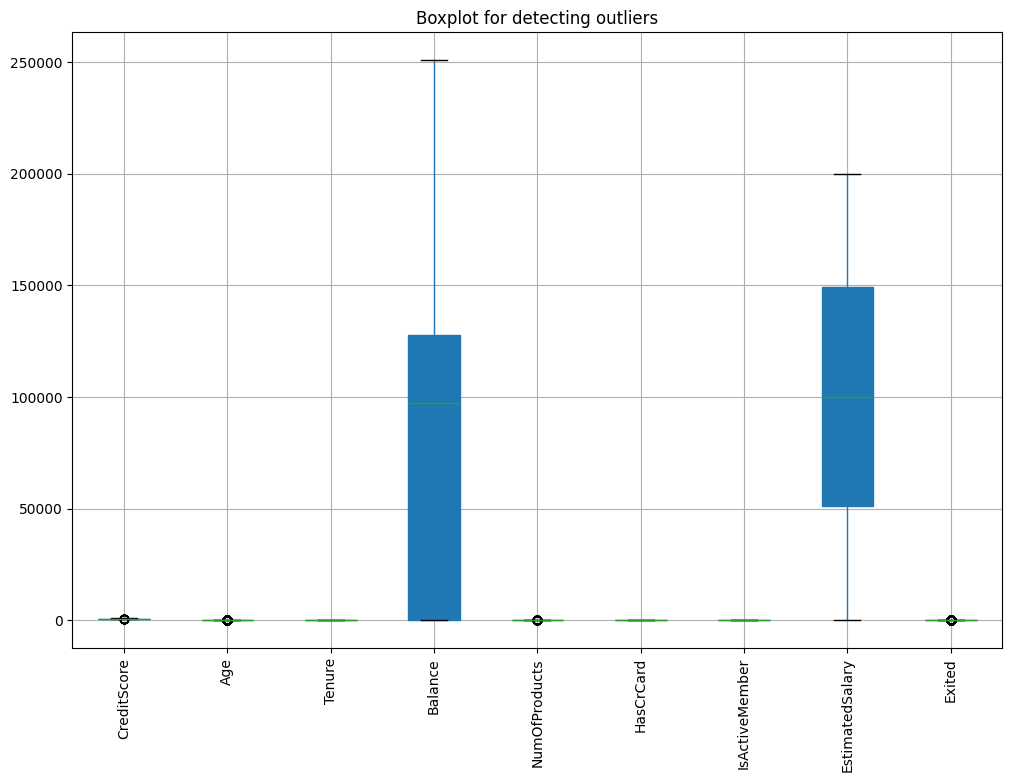

In [6]:
df.boxplot(figsize=(12, 8), patch_artist=True)
plt.xticks(rotation=90) 
plt.title('Boxplot for detecting outliers')
plt.show()

In [6]:
def detect_outliers_iqr(df_numeric):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers


outliers


**##Exploratory Data Analysis**<br>Target Variable: Exited<br>**Statistics** 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


*-CreditScores range widely with an average of 650.528, suggesting varied credit worthiness among customers.*<br>
*-The age distribution shows customers are typically middle-aged, with an average age of 38.92.*<br>
*-Account balances vary significantly, with some customers holding no balance and others up to 250,898.09, indicating diverse financial standings.*<br>
*-The majority of customers have a credit card and about half are active members. Finally, a 20% churn rate highlights the importance of identifying factors contributing to customer departure.*

In [8]:
df.describe(include='O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In geography, most people are from France and most of them are males.

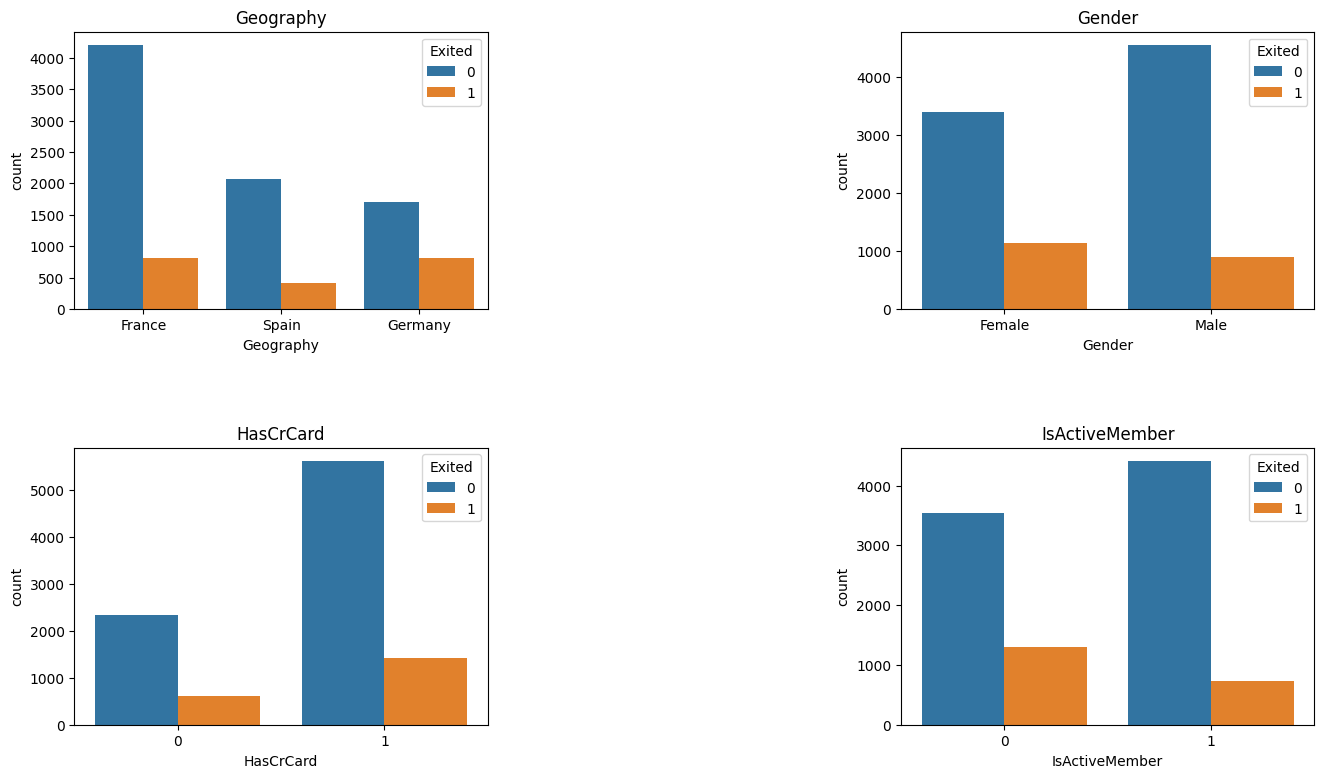

In [9]:
#Ploting the count plot for categorical features to analyse how they are performing between churn and non churn customers

Categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

fig = plt.figure(figsize=(16, 9))
for i, cat_features in enumerate(Categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=cat_features, hue = 'Exited',data = df)
    fig.subplots_adjust(hspace=0.5, wspace=1)
    plt.title(f'{cat_features}')


**From the above plots:**<br>
*-Germany has the highest proportion of churned customers(Exited=1),followed by France and then Spain.*<br>
*-France has the highest proportion of non churning customers,followed by Spain and then Germany.*<br>
*-Females churn more than male.*<br>
*-Astonishingly, customers with credit cards have the highest churning rate.*<br>
*-Inactive customers churn more compared to active customers.*

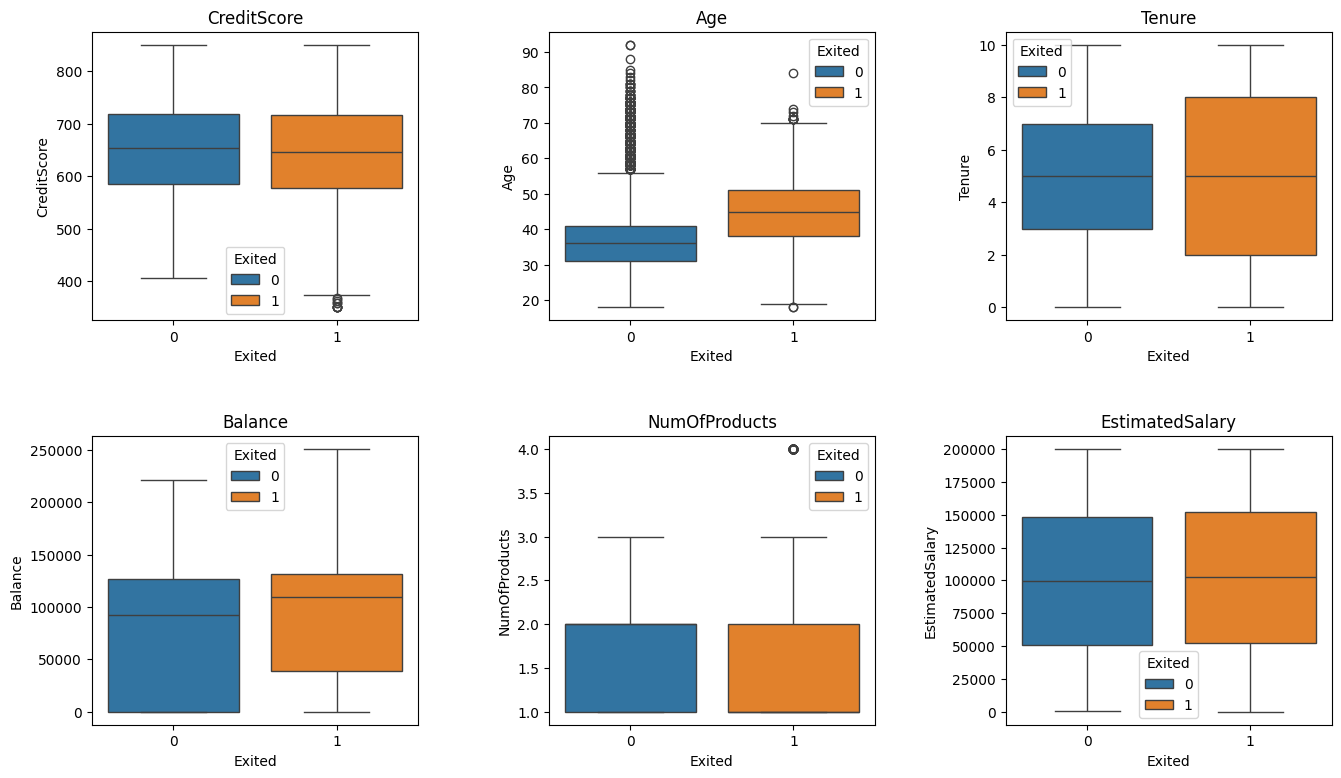

In [10]:
#Ploting the count plot for numerical features to analyse how they are performing between churn and non churn customers

Numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig = plt.figure(figsize=(16, 9))
for i, num_features in enumerate(Numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=num_features,x = 'Exited', hue = 'Exited',data = df)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.title(f'{num_features}')


**From the above plots:**<br>
*Credit score: Non churned and churned customers have a small/no difference.*<br>
*Age: Old customers have a high level of churning rate compared to the young customers.*<br>
*Tenure: Customers who have spent more time with the bank are more likely to churn compared to those who have spent an average time with it.*<br>
*Balance: Customers with higher balance are likely to leave which is not good for the bank.*<br>
*Number of products: Number of products don't have much impact on the rate of churn.*<br>
*Estimated salary has no any impact on the churn rate.*

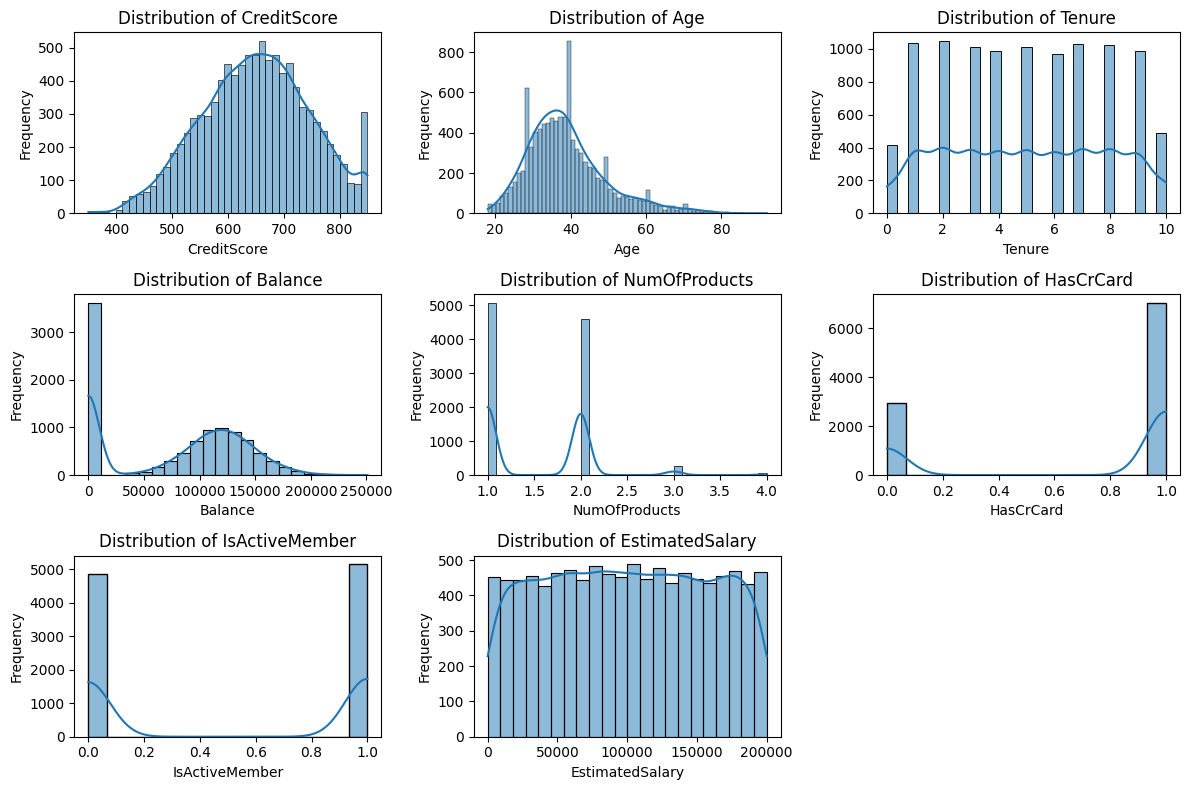

In [11]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**The histograms of numerical features from the dataset reveal a variety of distributions:**<br>
*-CreditScore appears normally distributed, indicating diverse financial health across customers.*<br>
*-Age shows a right-skewed distribution, with a younger customer base being more common.*<br>
*-Tenure is fairly uniform, suggesting no specific duration dominates customer banking relationships.*<br>
*-Balance has a large peak at zero, indicating a significant number of customers have no balance, with the remainder displaying a broad distribution.*<br>
*-NumOfProducts shows most customers have 1 or 2 products, with few opting for 3 or 4.*<br>
*-HasCrCard indicates most customers possess a credit card.*<br>
*-IsActiveMember has a bimodal distribution, implying a near even split between active and inactive members.*<br>
*-EstimatedSalary is uniformly distributed, showing no particular salary range dominance among customers.*

<Axes: xlabel='CreditScore', ylabel='Age'>

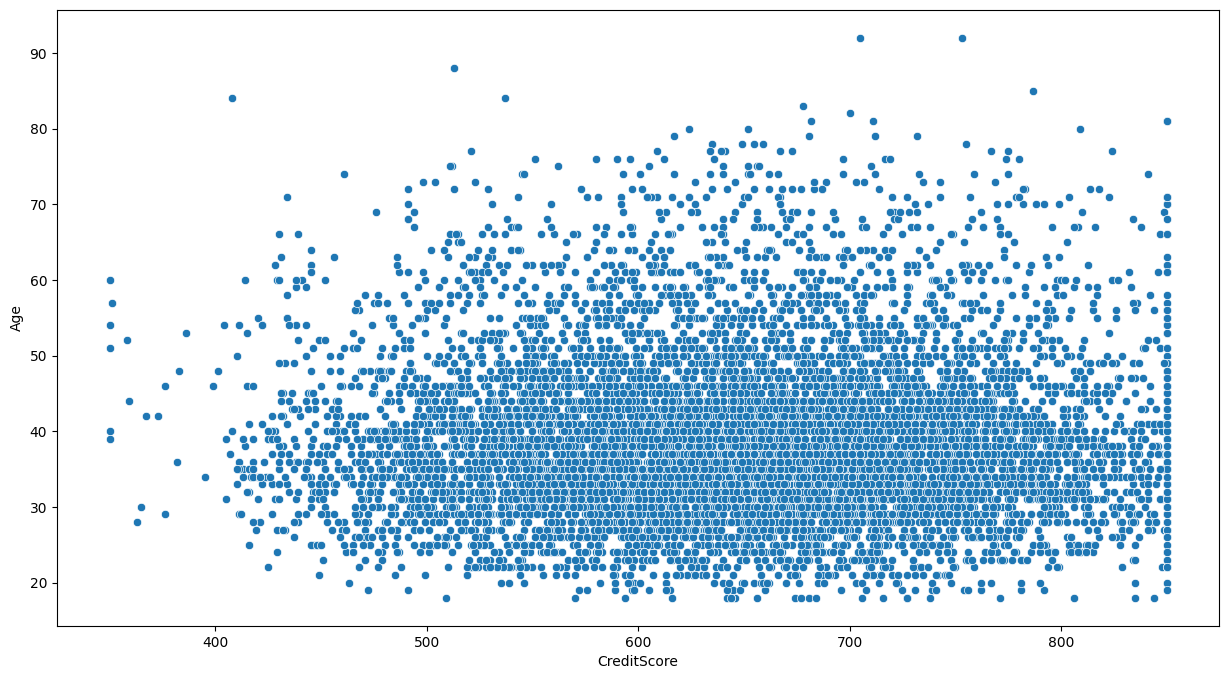

In [12]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='CreditScore', data=df, y='Age')

**##Data Preprocessing**

In [13]:
#Converting categorical variables to a dummy indicators for Gender

label_encoder = LabelEncoder()
gender_cat = df['Gender']
gender_encoded = label_encoder.fit_transform(gender_cat)

In [14]:
##Male=0,Female=1
gender_DF = pd.DataFrame(gender_encoded, columns=['Gender_new'])  
gender_DF.head()

,Gender_new
0,0
1,0
2,0
3,0
4,0


In [15]:
#Converting categorical variables to a dummy indicators for Geography
geography_cat = df['Geography']
geography_encoded = label_encoder.fit_transform(geography_cat)
binary_encoder = OneHotEncoder(categories='auto')
geography_1hot = binary_encoder.fit_transform(geography_encoded.reshape(-1, 1))
geography_1hot_mat = geography_1hot.toarray()
geography_DF = pd.DataFrame(geography_1hot_mat, columns=['France', 'Spain', 'Germany'])
geography_DF.head()

,France,Spain,Germany
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [16]:
#Dropping the original Gender and Geography attributes
df = df.drop(['Gender', 'Geography'], axis=1)

In [17]:
#Concatinating the dummy variables to the original dataset
df_dummy = pd.concat([df, gender_DF, geography_DF], axis=1, verify_integrity=True)
df_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_new,France,Spain,Germany
0,619,42,2,0.00,1,1,1,101348.88,1,0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0.0,0.0,1.0


In [18]:
covariance_matrix = np.cov(df[numeric_features].T)
print('\nCovariance Matrix:')
print(covariance_matrix)


Covariance Matrix:
[[ 9.34186016e+03 -4.01914975e+00  2.35354895e-01  3.78040770e+04
   6.87999040e-01 -2.40492449e-01  1.23913903e+00 -7.69470105e+03]
 [-4.01914975e+00  1.09994084e+02 -3.03229363e-01  1.85253334e+04
  -1.87157076e-01 -5.60355036e-02  4.48025623e-01 -4.34337293e+03]
 [ 2.35354895e-01 -3.03229363e-01  8.36467263e+00 -2.21139470e+03
   2.26157016e-02  2.97725773e-02 -4.09973797e-02  1.29468660e+03]
 [ 3.78040770e+04  1.85253334e+04 -2.21139470e+03  3.89343618e+09
  -1.10398151e+04 -4.22619801e+02 -3.14483074e+02  4.59238863e+07]
 [ 6.87999040e-01 -1.87157076e-01  2.26157016e-02 -1.10398151e+04
   3.38321792e-01  8.43984398e-04  2.79425943e-03  4.75147781e+02]
 [-2.40492449e-01 -5.60355036e-02  2.97725773e-02 -4.22619801e+02
   8.43984398e-04  2.07790529e-01 -2.70332033e-03 -2.60410522e+02]
 [ 1.23913903e+00  4.48025623e-01 -4.09973797e-02 -3.14483074e+02
   2.79425943e-03 -2.70332033e-03  2.49796970e-01 -3.28292660e+02]
 [-7.69470105e+03 -4.34337293e+03  1.29468660e+03

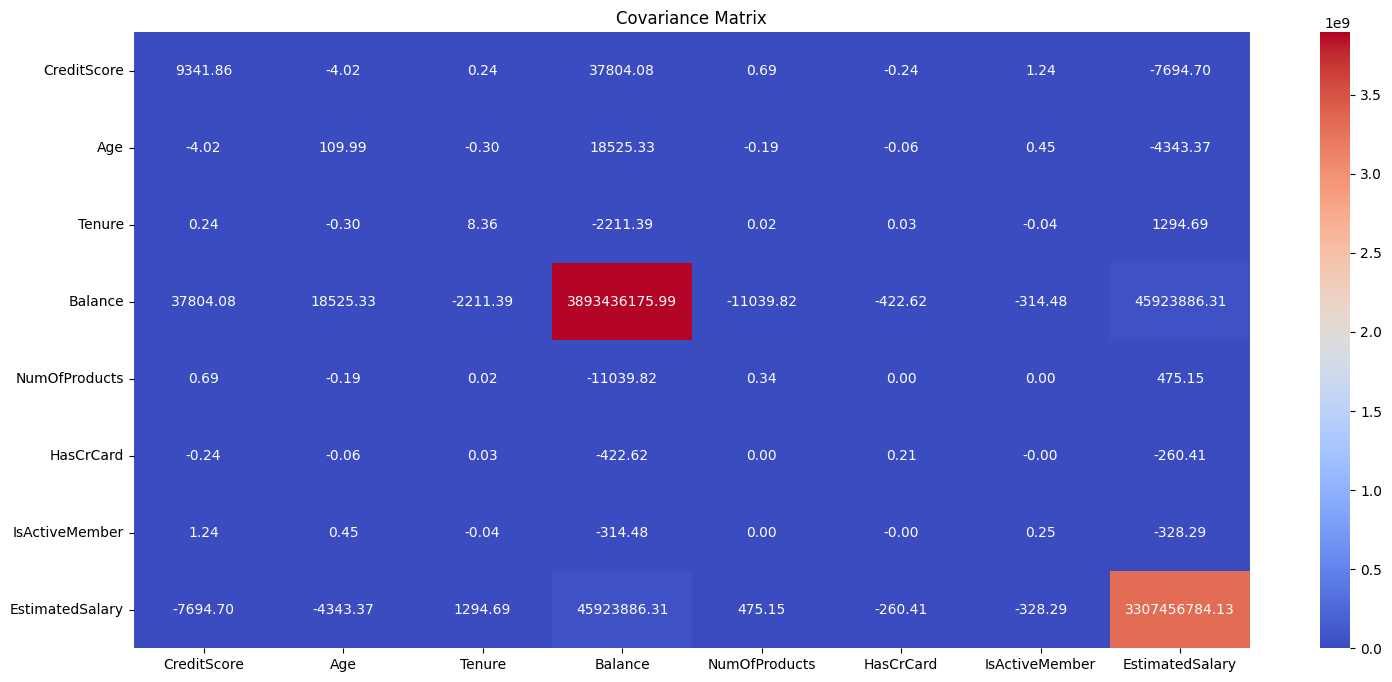

In [19]:
plt.figure(figsize=(18,8))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap = 'coolwarm', xticklabels=numeric_features, 
            yticklabels=numeric_features)
plt.title('Covariance Matrix')
plt.show()

*The above heatmap indicates the degree to which numerical variables in the dataset change together.*<br>
*A high positive value, such as that seen between 'Balance' and 'EstimatedSalary' suggests a stronger positive linear relationship where they increase together.*<br>
*Conversely, near-zero values indicates very weak linear relationships.*<br>
*Covariances near zero across many variables, as seen in the matrix, suggest that features do not have strong linear dependencies, which is beneficial for certain types of predictive modeling as it reduces multicollinearity concerns.*

In [20]:
df[df.columns].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Heatmap to get the correlation among different columns.

<Axes: >

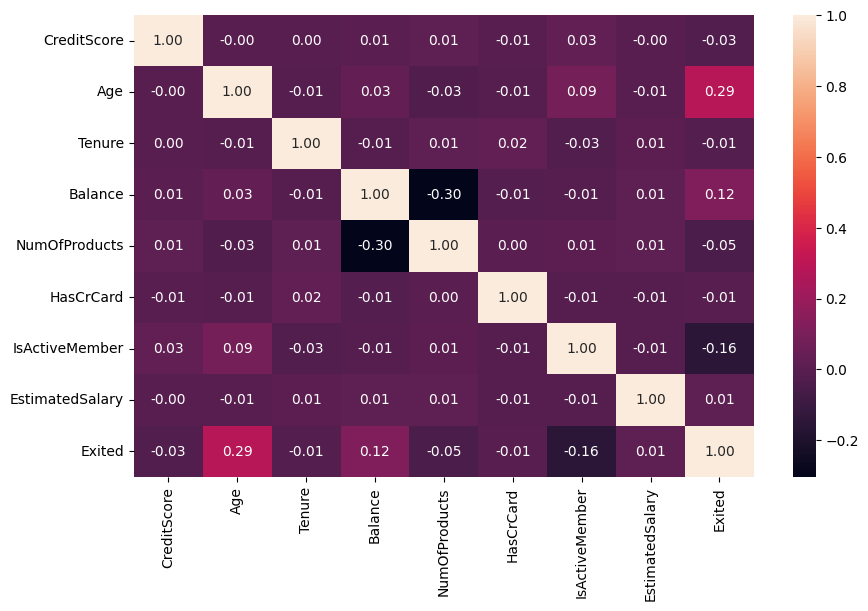

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f')

**The heatmap shows the correlation coefficients between numeric features:**<br>
*- 'Age' has a moderate positive correlation with the target variable 'Exited', suggesting older customers are more likely to churn.*<br>
*- 'NumOfProducts' and 'IsActiveMember' have negative correlations with 'Exited', indicating customers with more products or active memberships are less likely to leave.*<br>
*- Other variables show low correlation with the target, implying no strong linear relationships with customer churn.*<br>
*This information can inform feature selection and the understanding of factors that may influence churn.*

In [22]:
#Binning for Age
bins = [18, 35, 55, 92]

labels = ['young', 'middle-aged', 'old']
df['Age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.Age_bin.value_counts()
df.groupby('Age_bin')['Age'].mean( )
mean_ages = df.groupby('Age_bin')['Age'].transform('mean')
df['Age'] = mean_ages
df = df.drop('Age_bin', axis=1)
print(df)
df_dummy = pd.concat([df, gender_DF, geography_DF], axis=1, verify_integrity=True)

      CreditScore        Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619  42.362988       2       0.00              1          1   
1             608  42.362988       1   83807.86              1          0   
2             502  42.362988       8  159660.80              3          1   
3             699  42.362988       1       0.00              2          0   
4             850  42.362988       2  125510.82              1          1   
...           ...        ...     ...        ...            ...        ...   
9995          771  42.362988       5       0.00              2          1   
9996          516  30.073106      10   57369.61              1          1   
9997          709  42.362988       7       0.00              1          0   
9998          772  42.362988       3   75075.31              2          1   
9999          792  30.073106       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1       

**##Data Scaling & Feature Selection**<br> *-I wanted to explore more variables, so I considered the Balance-Estimated Salary Ratio that puts into account the balance and the estimated salary. This helps see whether customers with high balance-estimated salary ratio will churn or viceversa.*<br>*-Normalizing to reduce the effect of outliers and bring all numerical features on a similar scale.*

In [23]:
df_dummy['Balance_Estimate_Salary_Ratio'] = df_dummy['Balance']/(df_dummy['EstimatedSalary'])

In [24]:
#Normalizing the Credit score, Age, Balance, EstimatedSalary, Balance_Estimated_Salary_Ratio

df_dummy.CreditScore = (df_dummy.CreditScore - df_dummy.CreditScore.min())/(df_dummy.CreditScore.max() - df_dummy.CreditScore.min())

df_dummy.Age = (df_dummy.Age - df_dummy.Age.min())/(df_dummy.Age.max() - df_dummy.Age.min())

df_dummy.Balance = (df_dummy.Balance - df_dummy.Balance.min())/(df_dummy.Balance.max() - df_dummy.Balance.min())

df_dummy.EstimatedSalary = (df_dummy.EstimatedSalary - df_dummy.EstimatedSalary.min())/(df_dummy.EstimatedSalary.max() - \
                                                                                     df_dummy.EstimatedSalary.min())

df_dummy.Balance_Estimate_Salary_Ratio = (df_dummy.Balance_Estimate_Salary_Ratio - df_dummy.Balance_Estimate_Salary_Ratio.min())/ \
(df_dummy.Balance_Estimate_Salary_Ratio.max() - df_dummy.Balance_Estimate_Salary_Ratio.min())

In [25]:
df_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_new,France,Spain,Germany,Balance_Estimate_Salary_Ratio
0,0.538,0.367885,2,0.000000,1,1,1,0.506735,1,0,1.0,0.0,0.0,0.000000
1,0.516,0.367885,1,0.334031,1,0,1,0.562709,0,0,0.0,0.0,1.0,0.000070
2,0.304,0.367885,8,0.636357,3,1,0,0.569654,1,0,1.0,0.0,0.0,0.000132
3,0.698,0.367885,1,0.000000,2,0,0,0.469120,0,0,1.0,0.0,0.0,0.000000
4,1.000,0.367885,2,0.500246,1,1,1,0.395400,0,0,0.0,0.0,1.0,0.000150


*Note: Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a dataset while preserving maximum variation. But the given dataset does not have multidimensional data.*

**##Class Imbalance**

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

X_train=df_dummy['NumOfProducts']
y_train=df_dummy['Exited']

# Count before applying SMOTE
counter_before = Counter(y_train)
print('Before SMOTE:', counter_before)

# Convert X_train to numpy array and reshape if it has only one feature
if X_train.ndim == 1:
    X_train = X_train.values.reshape(-1, 1)
else:
    X_train = X_train.values

# Initialize the SMOTE object
smt = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# Count of the target variable after applying SMOTE
counter_after = Counter(y_train_sm)
print('After SMOTE:', counter_after)


Before SMOTE: Counter({0: 7963, 1: 2037})
After SMOTE: Counter({1: 7963, 0: 7963})
